# Alucar - Analisando as vendas

### Obtendo e conhecendo os dados

In [0]:
import pandas as pd

In [0]:
url_alucar_csv = "https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/alucar.csv"

In [76]:
alucar_df = pd.read_csv(url_alucar_csv)
alucar_df.head(7)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101


In [5]:
print('Quantidade de linhas e colunas:', alucar_df.shape)
print('Quantidade de dados nulos:', alucar_df.isna().sum().sum())
alucar_df.dtypes

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


mes       object
vendas     int64
dtype: object

### Transformar coluna de data em DateTime

In [6]:
alucar_df['mes'] = pd.to_datetime(alucar_df['mes'])
alucar_df.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

### Visualizando dados

In [7]:
!pip install seaborn==0.9.0

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

     |████████████████████████████████| 215kB 2.7MB/s 
  Found existing installation: seaborn 0.9.1
    Uninstalling seaborn-0.9.1:
      Successfully uninstalled seaborn-0.9.1


In [0]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  
  ax = sns.lineplot(x=x, y=y, data=dataset)

  ax.figure.set_size_inches(12,6)

  ax.set_title(titulo, loc='center', fontsize=14)

  ax.set_xlabel(labelx, fontsize=12)
  ax.set_ylabel(labely, fontsize=12)

  ax

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


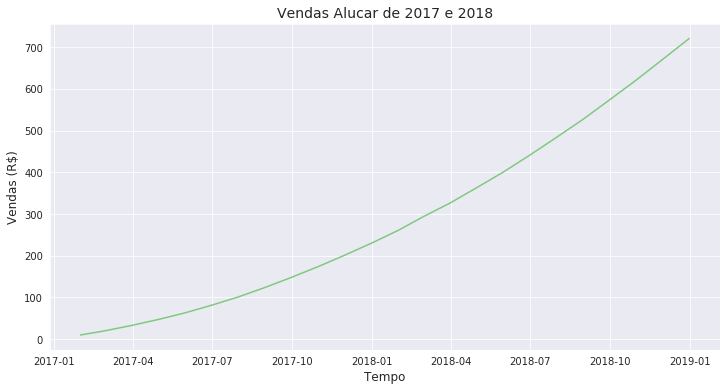

In [9]:
plotar('Vendas Alucar de 2017 e 2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', alucar_df)

In [77]:
alucar_df['aumento'] = alucar_df['vendas'].diff()
alucar_df.head(7)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0


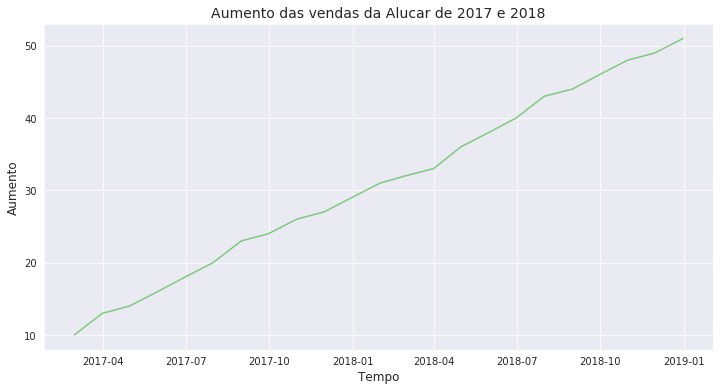

In [12]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar_df)

In [78]:
alucar_df['aceleracao'] = alucar_df['aumento'].diff()
alucar_df.head(7)

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0


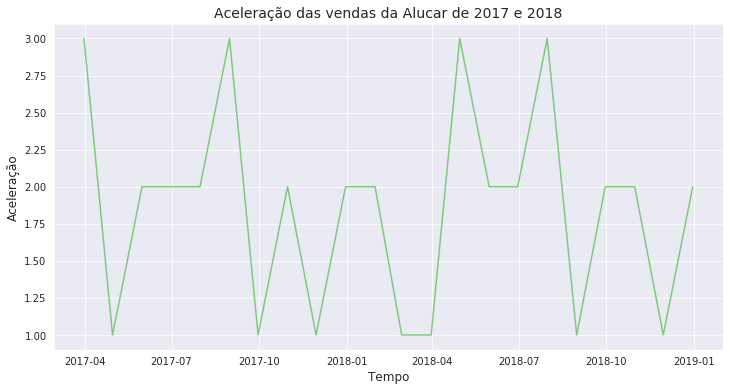

In [0]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar_df)

In [0]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))

    sub_plot = plt.subplot(3, 1, 1)
    sub_plot.set_title(titulo, fontsize=18, loc='center')
    sns.lineplot(x=x, y=y1, data=dataset)

    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)

    sub_plot

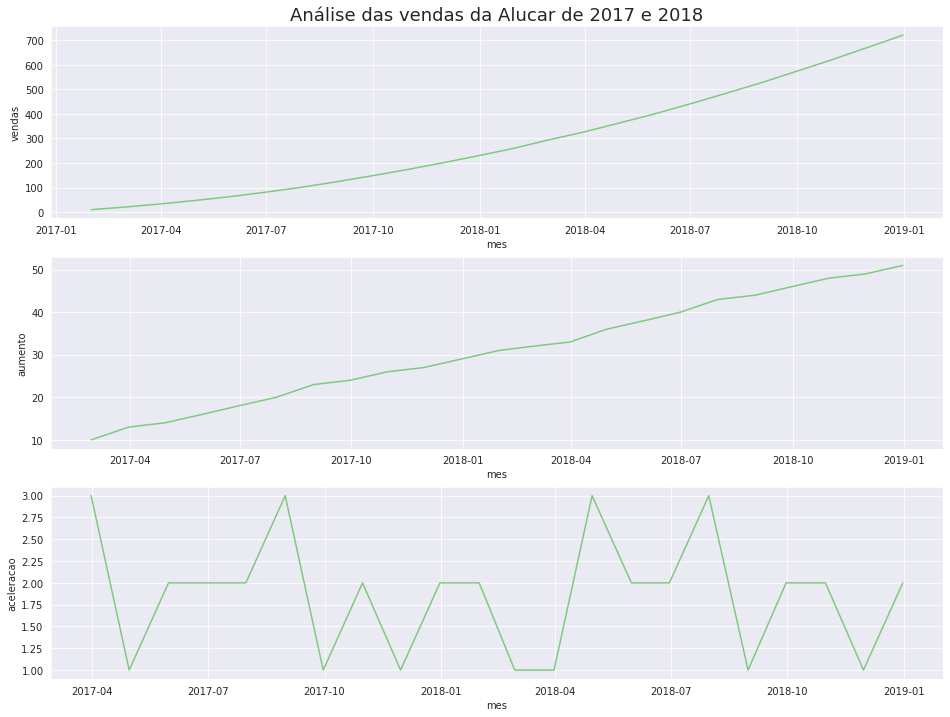

In [18]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar_df, 'Análise das vendas da Alucar de 2017 e 2018')

### Analisando autocorrelação de variaveis

In [0]:
from pandas.plotting import autocorrelation_plot

In [0]:
def plot_autocorrelation(tittle, series):
    ax = plt.figure(figsize=(12, 6))
    ax.suptitle(tittle, fontsize=18, x=0.26, y=0.95)
    autocorrelation_plot(series)
    ax = ax

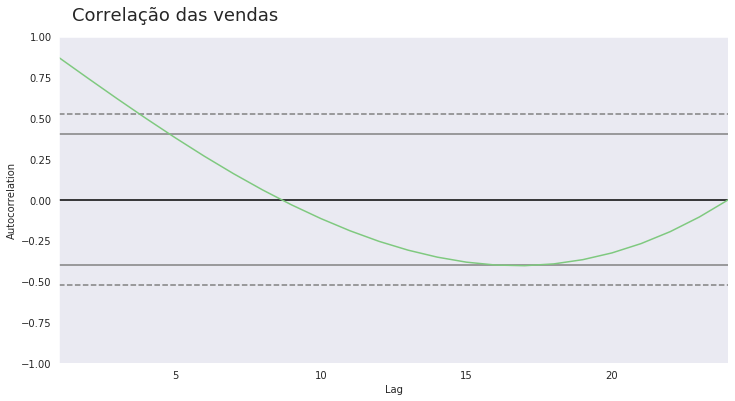

In [23]:
plot_autocorrelation('Correlação das vendas', alucar_df['vendas'])

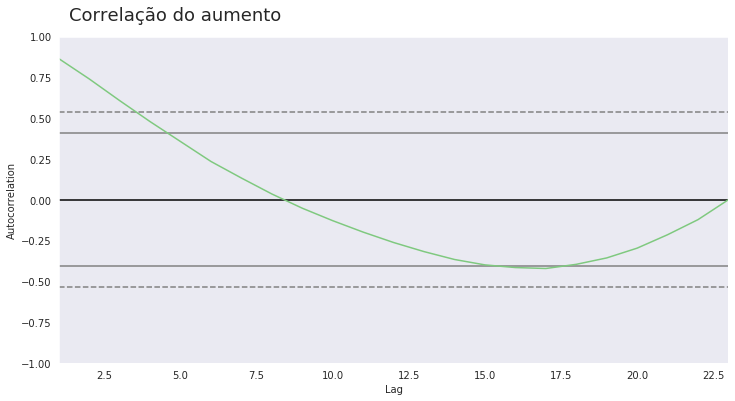

In [25]:
aumento_series = alucar_df['aumento'][1:]
plot_autocorrelation('Correlação do aumento', aumento_series)

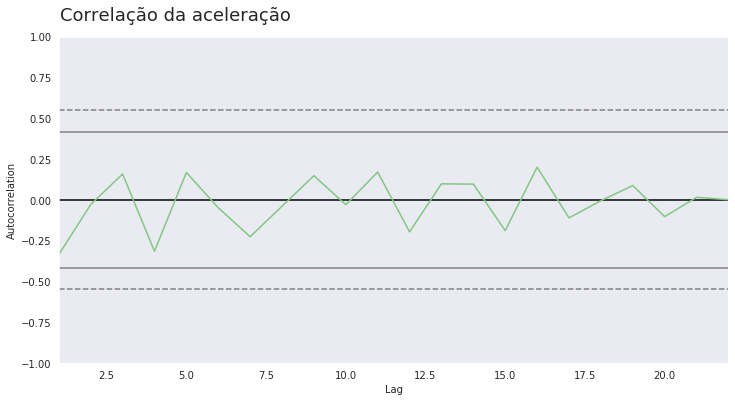

In [26]:
aumento_series = alucar_df['aceleracao'][2:]
plot_autocorrelation('Correlação da aceleração', aumento_series)

# Alucar - Analisando assinantes da newsletter

### Obtendo e transformando dados

In [79]:
assinantes_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/newsletter_alucar.csv')
assinantes_df.head(7)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85


In [71]:
print('Quantidade de linhas e colunas:', assinantes_df.shape)
print('Quantidade de dados nulos:', assinantes_df.isna().sum().sum())
assinantes_df.dtypes

Quantidade de linhas e colunas: (24, 4)
Quantidade de dados nulos: 3


mes           datetime64[ns]
assinantes             int64
aumento              float64
aceleracao           float64
dtype: object

In [80]:
assinantes_df['mes'] = pd.to_datetime(assinantes_df['mes'])
assinantes_df['aumento'] = assinantes_df['assinantes'].diff()
assinantes_df['aceleracao'] = assinantes_df['aumento'].diff()
assinantes_df.head(7)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0


### Visualizando dados

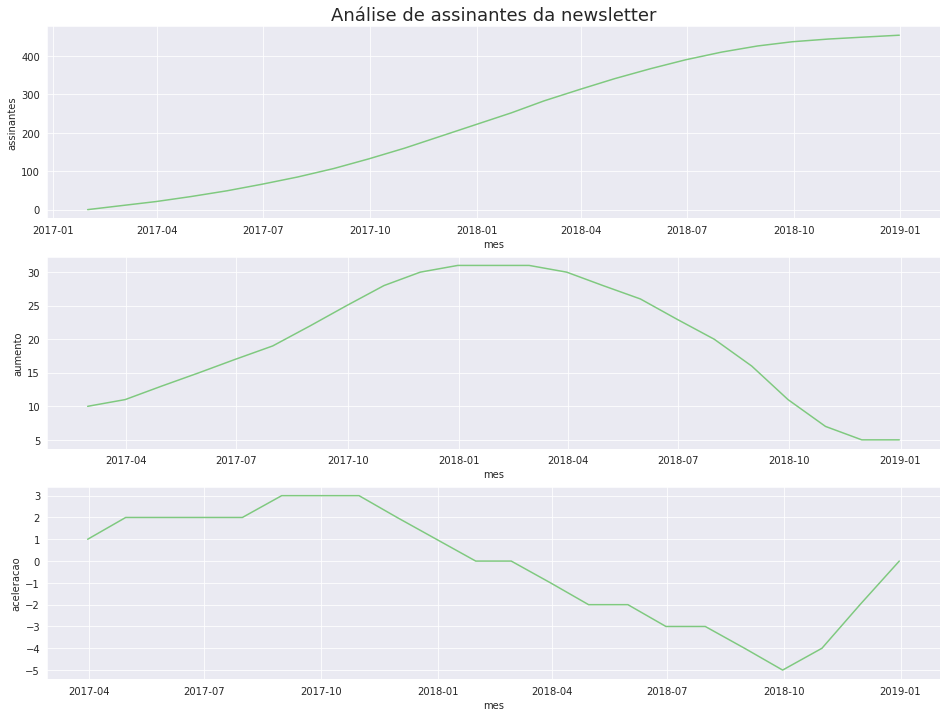

In [72]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes_df, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

### Obtendo e transformando dados

In [81]:
chocolura_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/chocolura.csv')
chocolura_df.head(7)

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210


In [37]:
print('Quantidade de linhas:', chocolura_df.shape)
print('Quantidade de dados nulos:', chocolura_df.isna().sum().sum())
chocolura_df.dtypes

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


mes       object
vendas     int64
dtype: object

In [82]:
chocolura_df['mes'] = pd.to_datetime(chocolura_df['mes'])
chocolura_df['aumento'] = chocolura_df['vendas'].diff()
chocolura_df['aceleracao'] = chocolura_df['aumento'].diff()
chocolura_df.head(7)

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0


### Visualizando dados

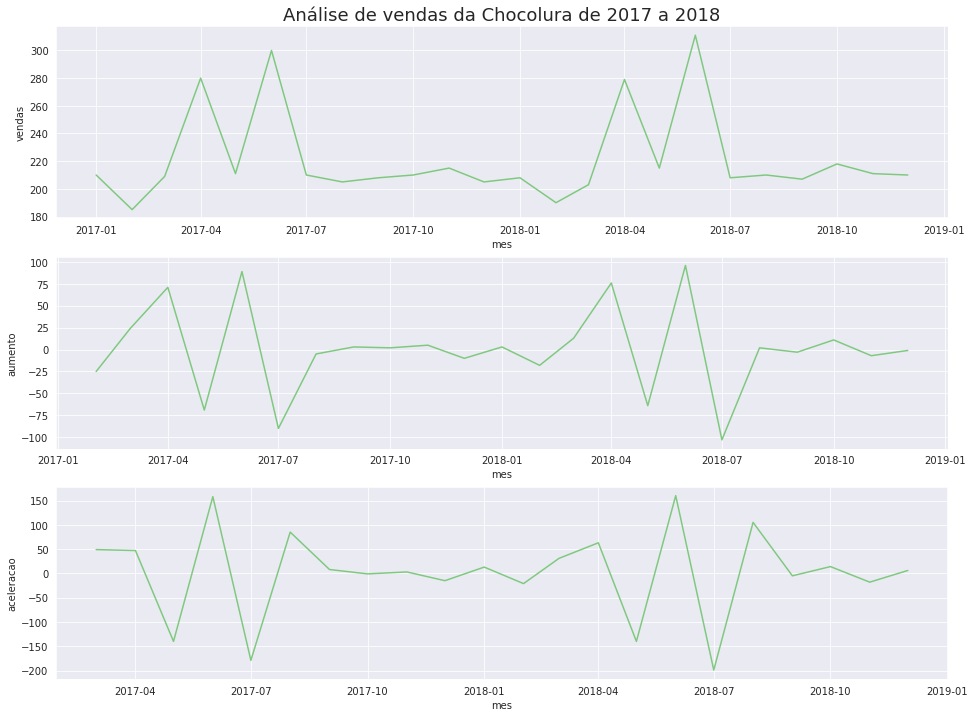

In [39]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura_df, 'Análise de vendas da Chocolura de 2017 a 2018')

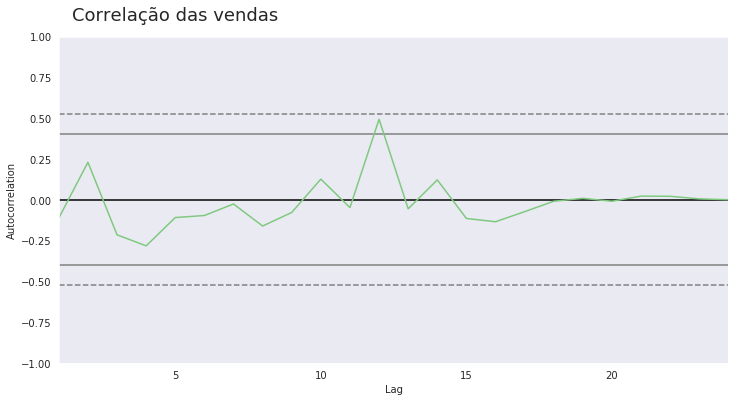

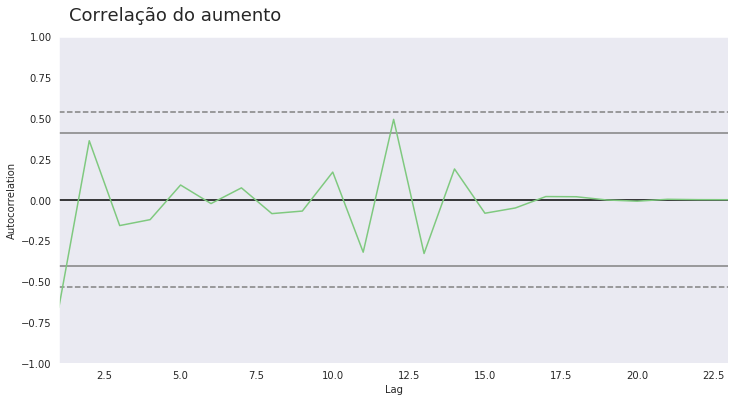

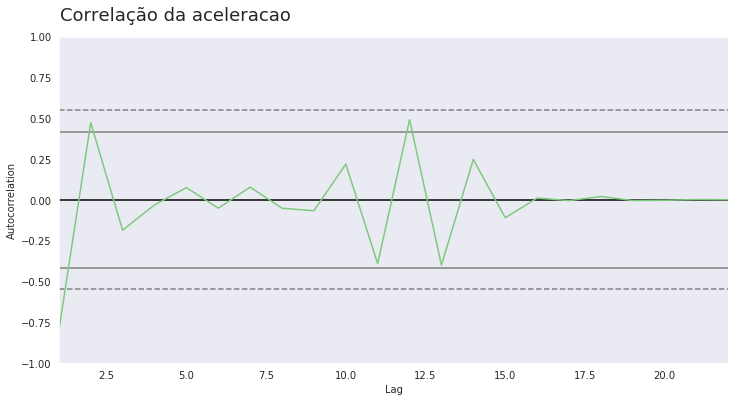

In [41]:
plot_autocorrelation('Correlação das vendas', chocolura_df['vendas'])
plot_autocorrelation('Correlação do aumento', chocolura_df['aumento'][1:])
plot_autocorrelation('Correlação da aceleracao', chocolura_df['aceleracao'][2:])

# Chocolura - Vendas diárias (Outubro e Novembro)

### Obtendo e transformando dados

In [86]:
vendas_por_dia_chocolura_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/vendas_por_dia.csv')
vendas_por_dia_chocolura_df.head(7)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
5,2018-10-06,18
6,2018-10-07,20


In [87]:
print('Quantidade de linhas e colunas:', vendas_por_dia_chocolura_df.shape)
print('Quantidade de dados nulos:', vendas_por_dia_chocolura_df.isna().sum().sum())
vendas_por_dia_chocolura_df.dtypes

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


dia       object
vendas     int64
dtype: object

In [0]:
vendas_por_dia_chocolura_df['dia'] = pd.to_datetime(vendas_por_dia_chocolura_df['dia'])
vendas_por_dia_chocolura_df['aumento'] = vendas_por_dia_chocolura_df['vendas'].diff()
vendas_por_dia_chocolura_df['aceleracao'] = vendas_por_dia_chocolura_df['aumento'].diff()

### Visualizando dados

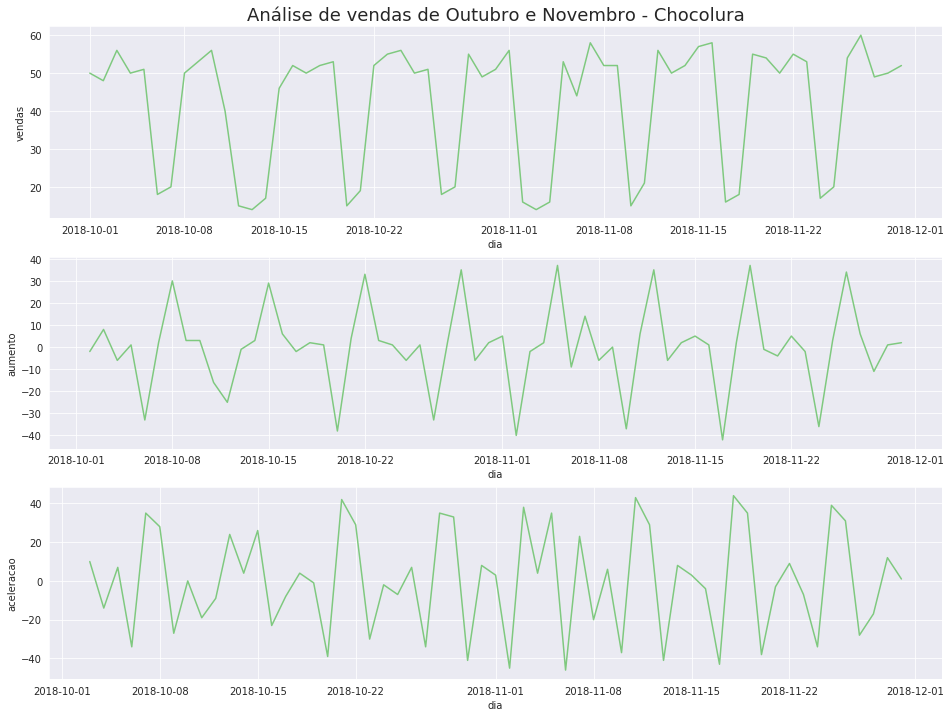

In [51]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia_chocolura_df, 'Análise de vendas de Outubro e Novembro - Chocolura')

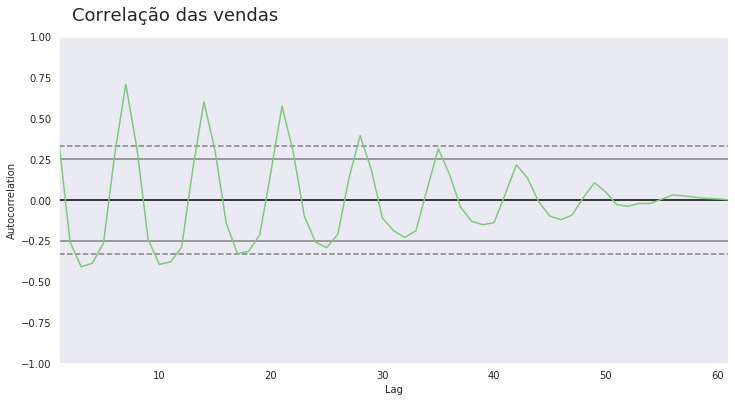

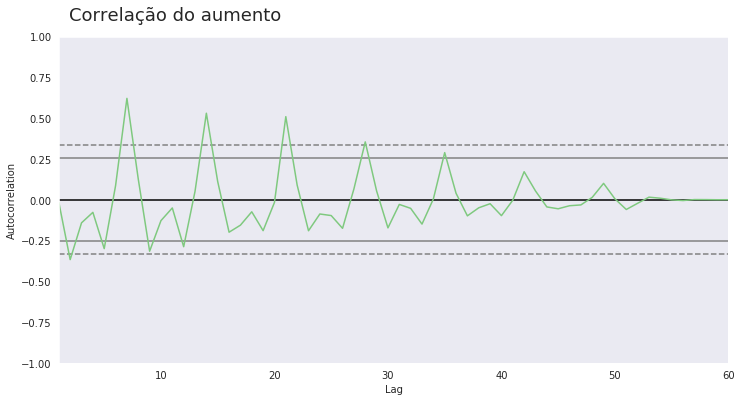

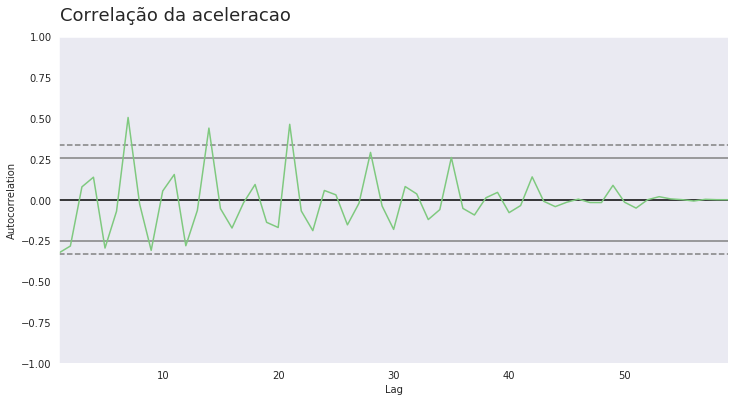

In [52]:
plot_autocorrelation('Correlação das vendas', vendas_por_dia_chocolura_df['vendas'])
plot_autocorrelation('Correlação do aumento', vendas_por_dia_chocolura_df['aumento'][1:])
plot_autocorrelation('Correlação da aceleracao', vendas_por_dia_chocolura_df['aceleracao'][2:])

### Analisando a sazonalidade

In [89]:
vendas_por_dia_chocolura_df['dia_da_semana'] = vendas_por_dia_chocolura_df['dia'].dt.weekday_name
vendas_por_dia_chocolura_df.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [90]:
vendas_por_dia_chocolura_df['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [0]:
dias_ptbr = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo'}

In [92]:
vendas_por_dia_chocolura_df['dia_da_semana'] = vendas_por_dia_chocolura_df['dia_da_semana'].map(dias_ptbr)
vendas_por_dia_chocolura_df.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


**Agrupando por dia**

In [93]:
vendas_agrupadas_por_dia = vendas_por_dia_chocolura_df.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas_por_dia.head(7)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


### Visualizando autocorrelação das vendas diárias


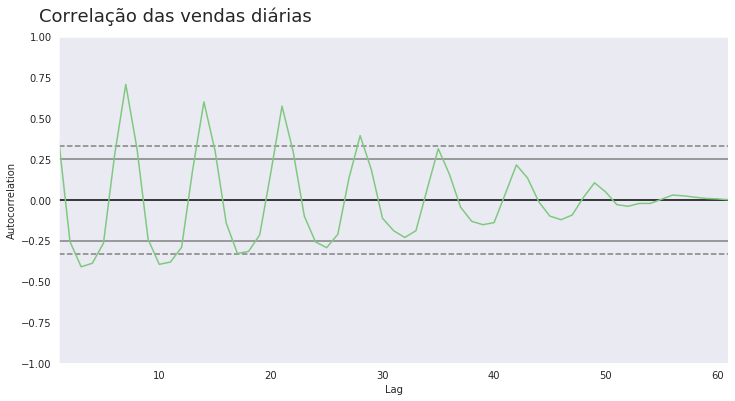

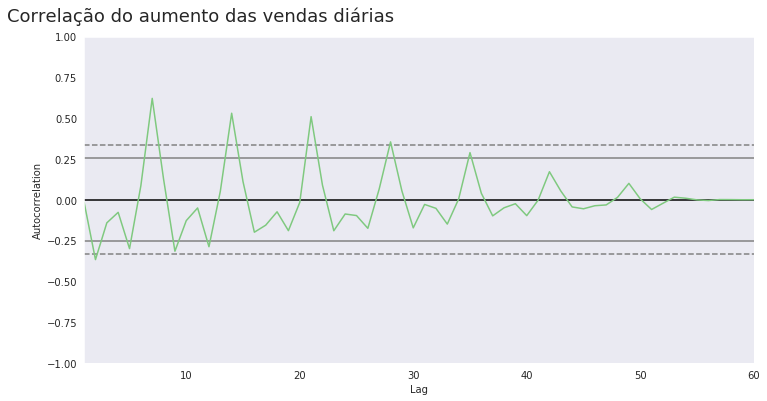

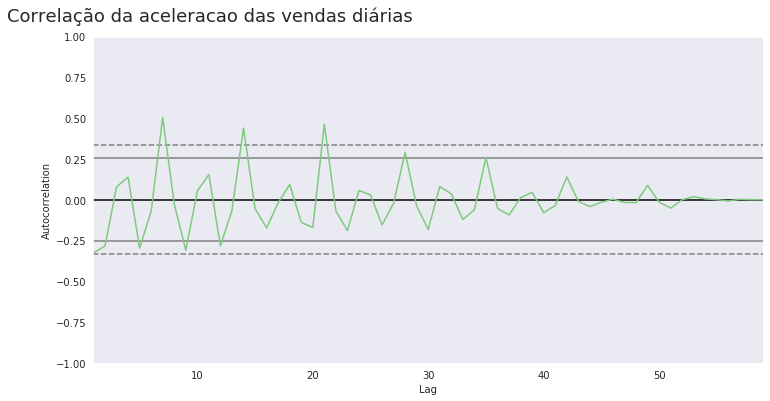

In [73]:
plot_autocorrelation('Correlação das vendas diárias', vendas_por_dia_chocolura_df['vendas'])
plot_autocorrelation('Correlação do aumento das vendas diárias', vendas_por_dia_chocolura_df['aumento'][1:])
plot_autocorrelation('Correlação da aceleracao das vendas diárias', vendas_por_dia_chocolura_df['aceleracao'][2:])

# Cafelura - Analisando as vendas

### Obtendo e transformando dados

In [94]:
cafelura_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/cafelura.csv')
cafelura_df.head(7)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096


In [96]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())
cafelura_df.dtypes

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


mes       datetime64[ns]
vendas             int64
dtype: object

In [98]:
cafelura_df['mes'] = pd.to_datetime(cafelura_df['mes'])
cafelura_df['aumento'] = cafelura_df['vendas'].diff()
cafelura_df['aceleracao'] = cafelura_df['aumento'].diff()
cafelura_df.head(7)


,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0
5,2017-06-30,7380,1710.0,-120.0
6,2017-07-31,8096,716.0,-994.0


### Vizualizando dados

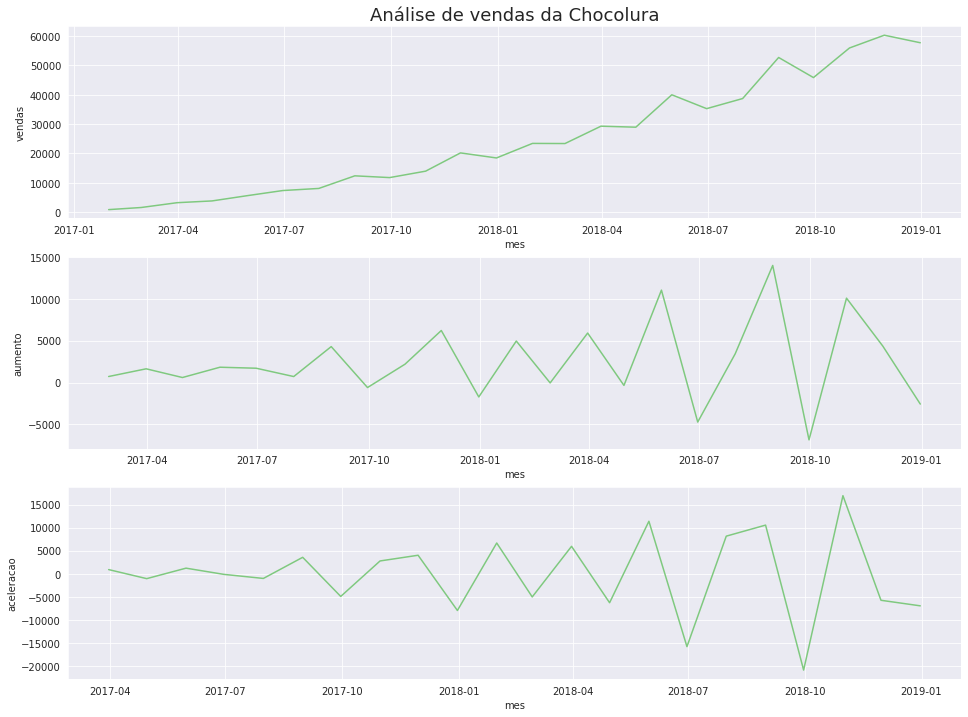

In [103]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', cafelura_df, 'Análise de vendas da Chocolura')

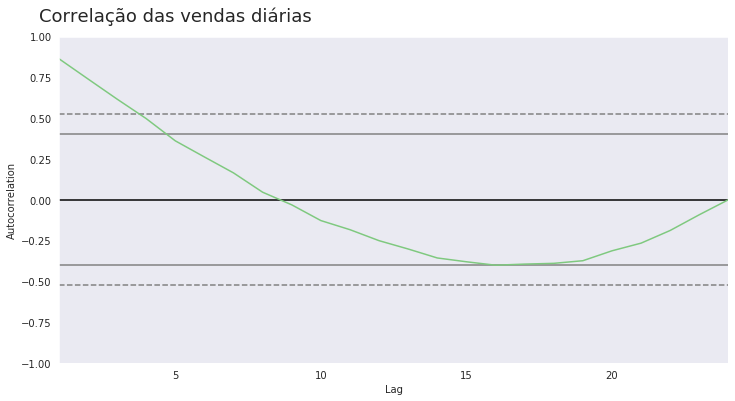

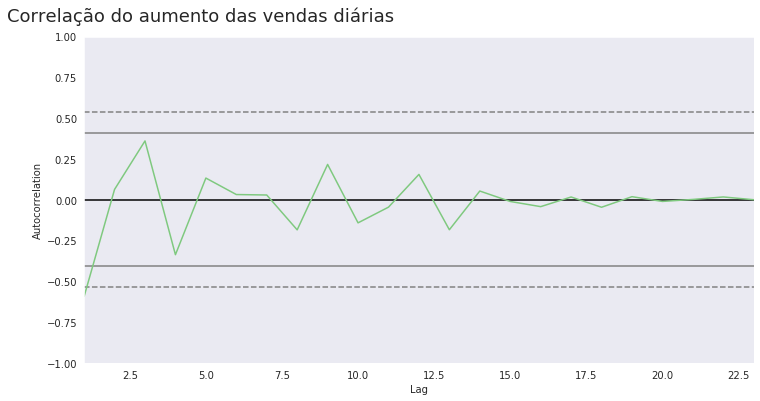

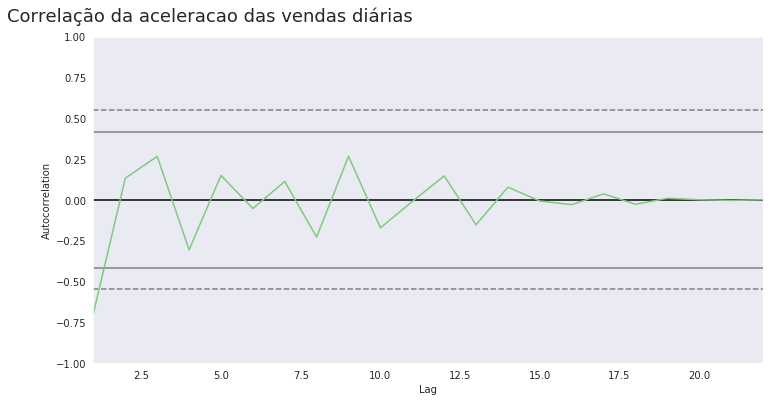

In [104]:
plot_autocorrelation('Correlação das vendas diárias', cafelura_df['vendas'])
plot_autocorrelation('Correlação do aumento das vendas diárias', cafelura_df['aumento'][1:])
plot_autocorrelation('Correlação da aceleracao das vendas diárias', cafelura_df['aceleracao'][2:])

### Normalizando dados

In [105]:
quantidade_de_dias_de_fds = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head(7)

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8


In [106]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

**Removendo dias de finais de semana**

In [107]:
cafelura_df['vendas_normalizadas'] = cafelura_df['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura_df.head(7)

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0
5,2017-06-30,7380,1710.0,-120.0,820.0
6,2017-07-31,8096,716.0,-994.0,1012.0


### Comparando vendas com e sem normalização




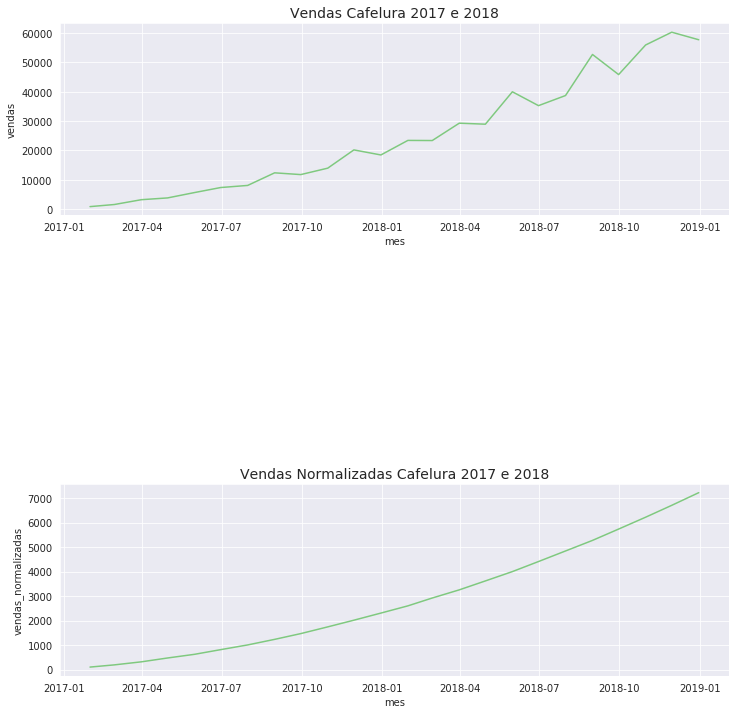

In [115]:
plt.figure(figsize=(12, 12))

ax = plt.subplot(3, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=14)
sns.lineplot(x='mes', y='vendas', data=cafelura_df)

ax = plt.subplot(3, 1 , 3)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=14)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura_df)

ax

# Decomposições sazonais

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

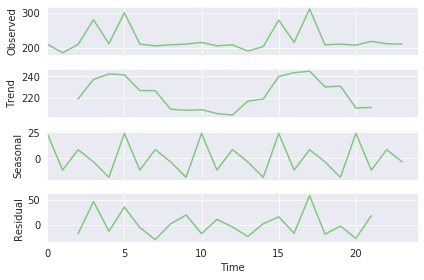

In [141]:
resultado = seasonal_decompose([chocolura_df['vendas']], freq=5)
ax = resultado.plot()

In [0]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [138]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado_df = pd.DataFrame(data)
resultado_df.head(7)

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,23.76,NaN
1,185,NaN,-10.99,NaN
2,209,219.0,8.36,-18.36
3,280,237.0,-3.24,46.24
4,211,242.0,-17.89,-13.11
5,300,241.2,23.76,35.04
6,210,226.8,-10.99,-5.81


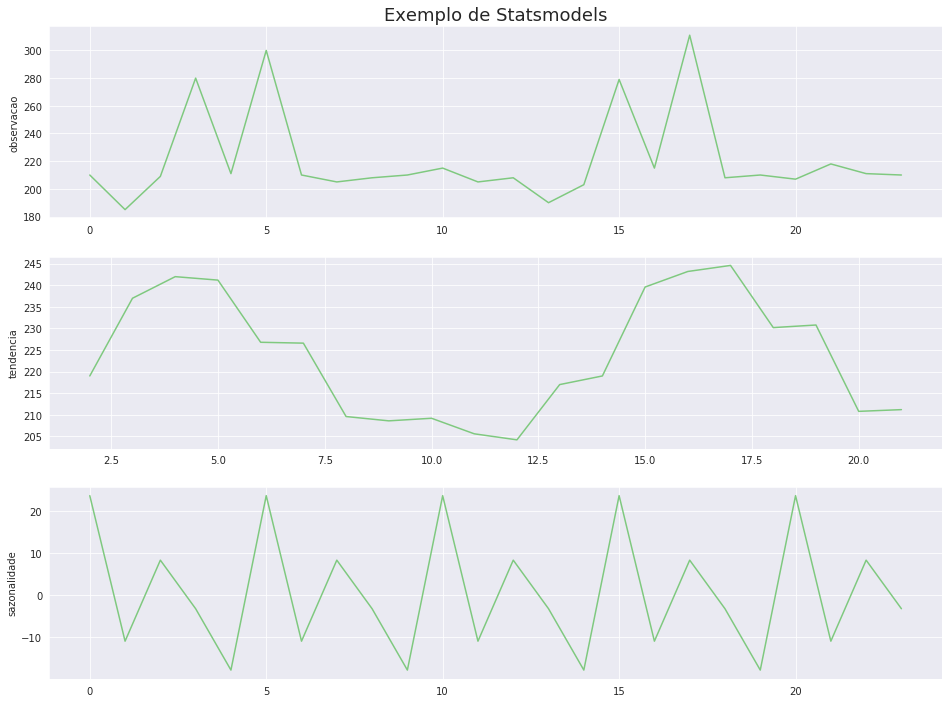

In [140]:
plot_comparacao(resultado_df.index, 'observacao', 'tendencia', 'sazonalidade', resultado_df, 'Exemplo de Statsmodels')

# Alucel - Analisando de vendas

In [144]:
alucel_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-series-temporais/alucel.csv')
alucel_df['dia'] = pd.to_datetime(alucel_df['dia'])
alucel_df['aumento'] = alucel_df['vendas'].diff()
alucel_df['aceleracao'] = alucel_df['aumento'].diff()
alucel_df.head(7)

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
5,2018-10-06,2005.89,59.72,52.57
6,2018-10-07,3793.07,1787.18,1727.46


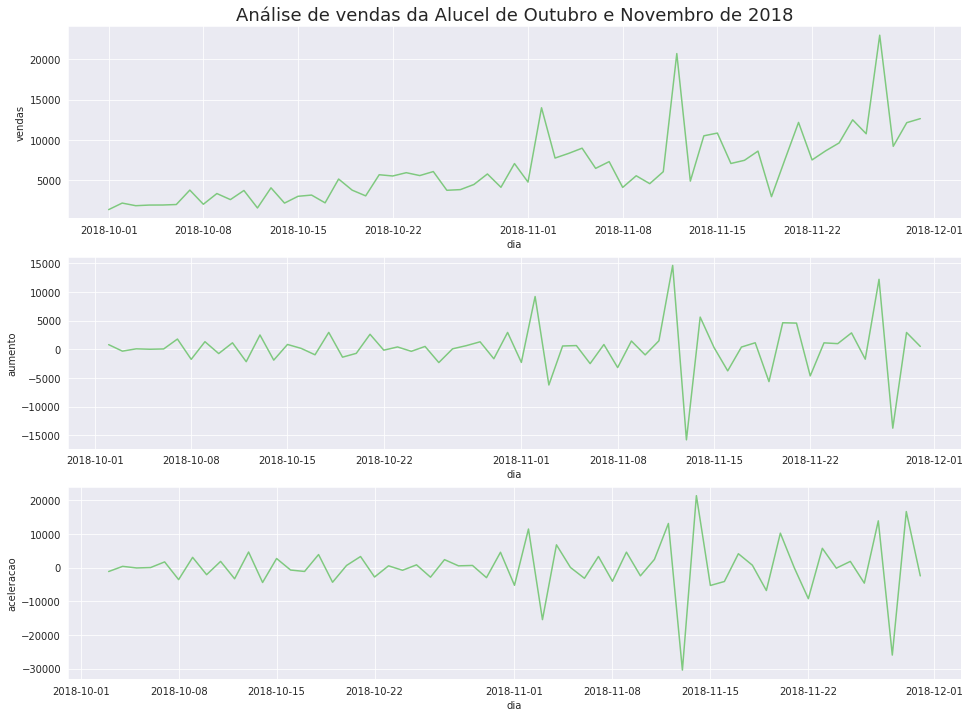

In [145]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel_df, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

### Média móvel

In [146]:
alucel_df['media_movel'] = alucel_df['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
5,2018-10-06,2005.89,59.72,52.57
6,2018-10-07,3793.07,1787.18,1727.46


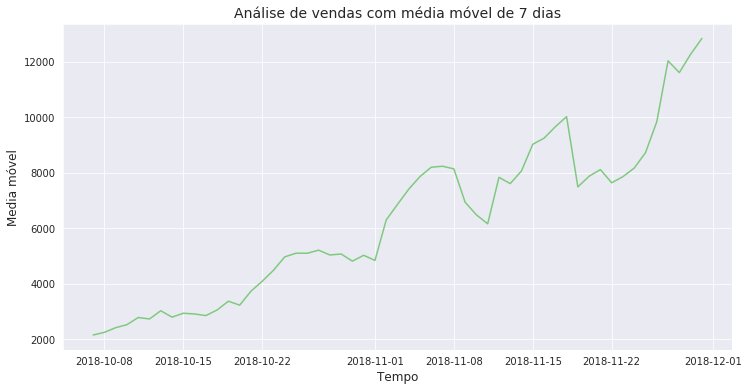

In [148]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Media móvel', 'dia', 'media_movel', alucel_df)

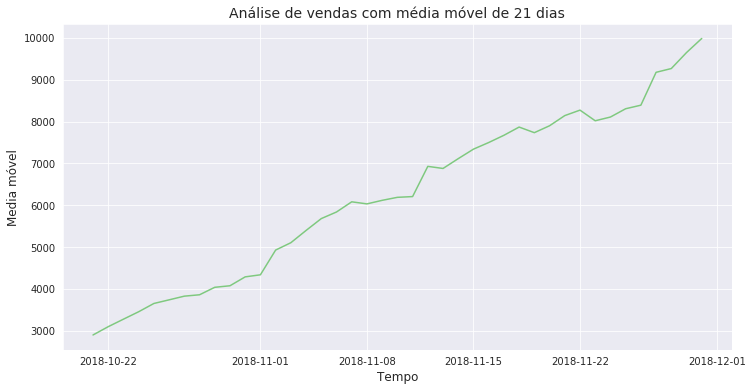

In [150]:
alucel_df['media_movel_21'] = alucel_df['vendas'].rolling(21).mean()
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Media móvel', 'dia', 'media_movel_21', alucel_df)

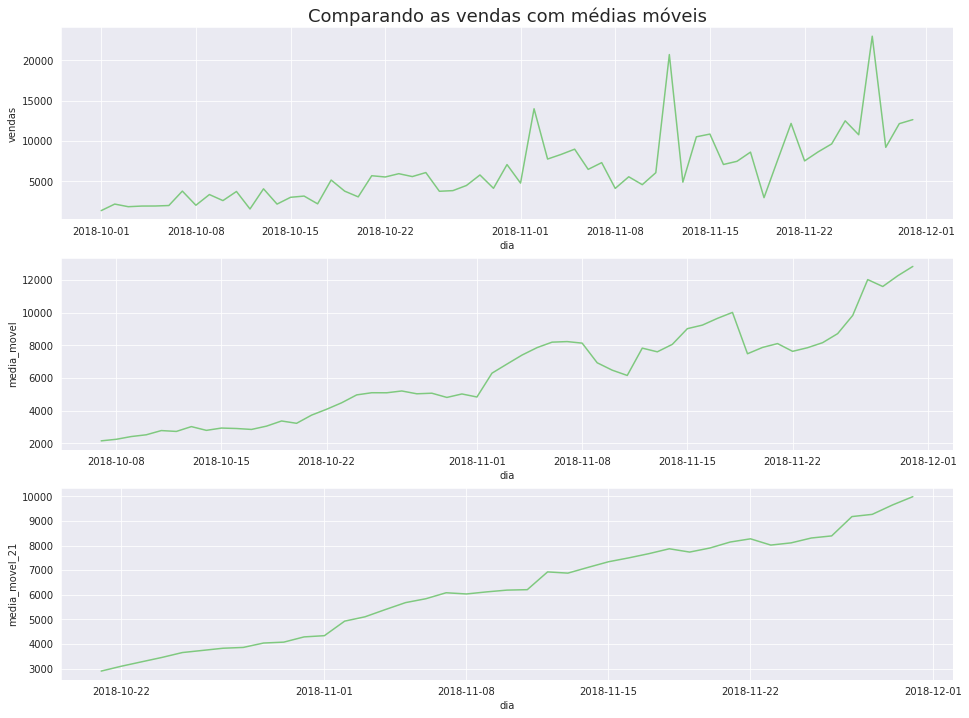

In [151]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel_df, 'Comparando as vendas com médias móveis')